In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from numpy.linalg import inv

In [2]:
data = pd.read_csv('abalone.data.csv')
data.columns = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']
data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
...,...,...,...,...,...,...,...,...,...
4171,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4172,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4173,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4174,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [3]:
corr = data.corr()
corr

C:\Users\apexl\AppData\Local\Temp\ipykernel_18008\2601176157.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986813,0.827552,0.925255,0.897905,0.903010,0.897697,0.557123
Diameter,0.986813,1.000000,0.833705,0.925452,0.893159,0.899726,0.905328,0.575005
Height,0.827552,0.833705,1.000000,0.819209,0.774957,0.798293,0.817326,0.558109
Whole weight,0.925255,0.925452,0.819209,1.000000,0.969403,0.966372,0.955351,0.540818
Shucked weight,0.897905,0.893159,0.774957,0.969403,1.000000,0.931956,0.882606,0.421256
Viscera weight,0.903010,0.899726,0.798293,0.966372,0.931956,1.000000,0.907647,0.504274
Shell weight,0.897697,0.905328,0.817326,0.955351,0.882606,0.907647,1.000000,0.628031
Rings,0.557123,0.575005,0.558109,0.540818,0.421256,0.504274,0.628031,1.000000


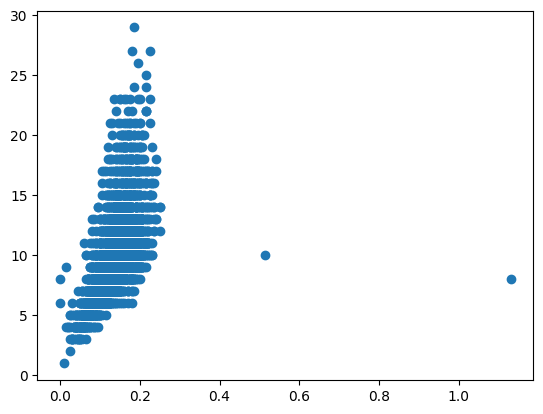

In [4]:
plt.scatter(data['Height'] , data['Rings'])

In [59]:
X = data[['Height']]
Y = data['Rings']

X_train, X_test, Y_train, Y_test = train_test_split(X , Y, test_size= 0.2)

X_train.shape

(3340, 1)

In [69]:
class LinearLeastSquare:
    def __init__(self):
        pass
    
    # train
    def fit(self, X, Y):
        X = X.values.reshape(-1,1)
        Y = Y.values.reshape(-1,1)
        # w = (X.T * X)^-1 * (X.T * Y)
        self.w = np.matmul(inv(np.matmul(X.T, X)), np.matmul(X.T, Y))
    
    def predict(self, x):
        height_pred = x * self.w
        return height_pred  
    
    def evaluate(self, X, Y, loss):
        X = X.values.reshape(-1,1)
        Y = Y.values.reshape(-1,1)
        
        Y_pred = []
        for i in range(X.shape[0]):
            y_pred = self.predict(X[i])
            Y_pred.append(y_pred)
        
        Y_pred = np.array(Y_pred)
        Error = Y - Y_pred
        
        if loss == 'MSE':
            return np.mean(Error ** 2)
        
        elif loss == 'MAE':
            return np.mean(np.abs(Error))
        
        elif loss == 'Huber':
            is_small_error = np.abs(Error) < 1
            squared_loss = np.square(Error) / 2
            linear_loss  = np.abs(Error) - 0.5
            huber = np.mean(np.where(is_small_error, squared_loss, linear_loss))
            print('Huber loss:')
            return huber
        
        elif loss == 'Hinge':
            new_predicted = np.array([-1 if i==0 else i for i in Y_pred])
            new_actual = np.array([-1 if i==0 else i for i in Y])

            # calculating hinge loss
            hinge_loss = np.mean([max(0, 1-x*y) for x, y in zip(new_actual, new_predicted)])
            print('Hinge loss:')
            return hinge_loss

In [70]:
lls = LinearLeastSquare()
lls.fit(X_train, Y_train)

In [71]:
lls.w

array([[68.6037125]])

In [72]:
Y_pred = X_train * lls.w[0,0]

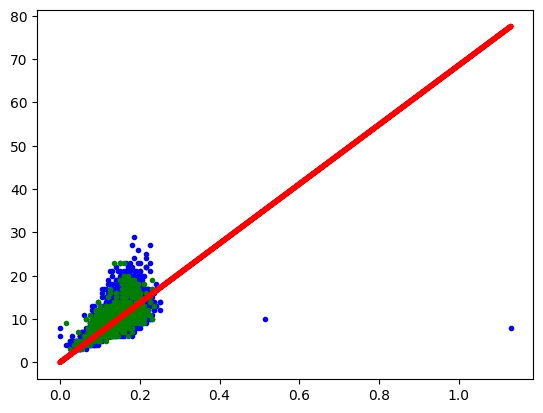

In [73]:
plt.scatter(X_train, Y_train, c='b', marker='.')
plt.scatter(X_test, Y_test, c='g', marker='.')
plt.plot(X_train, Y_pred, c='r', lw=4)

In [74]:
lls.evaluate(X_test, Y_test, loss='MAE')

3.132552916692167

In [75]:
lls.evaluate(X_test, Y_test, loss='MSE')

16.21021203238472

In [76]:
lls.evaluate(X_test, Y_test, loss='Huber')

Huber loss:


2.6672198585073676

In [77]:
lls.evaluate(X_test, Y_test, loss='Hinge')

Hinge loss:


array([[0.00037555]])